# Numerisk Integrering - Forelesning 23.11.2023

## Målet for denne forelesningen:
- Eksamensinformasjon
- Prøveeksamen Gjennomgang av oppgaver
- Forstå hva numerisk integrasjon er og hvordan de fungerer
- Forstå Trapesmetoden og Simpsons Metode
- Live-kode numerisk integrasjonsmetoder i Julia


## Introduksjon

Dette kapittelet inroduserer numerisk integrasjon, en viktig teknikk for å beregne det definerte integralet av en funksjon når analytiske metoder er vanskelige eller umulige å bruke. Vi vil fokusere på to populære metoder: Trapezoidal Rule og Simpson's Rule. Vi vil også se på hvordan vi kan bruke Julia til å implementere disse metodene.

## Hvorfor numerisk integrasjon?

Numerisk integrasjon er en essensiell teknikk i mange felt, inkludert finans. I finansverdenen er det ofte nødvendig å beregne integrasjoner av komplekse funksjoner for å forstå og forutsi økonomiske trender, verdsette derivater, og beregne risiko. Analytiske løsninger er ikke alltid mulige, spesielt i tilfeller med komplekse finansielle modeller. Dette gjør numerisk integrering til et uvurderlig verktøy.

I finansverdenen er denne teknikken viktig fordi den hjelper til med å løse problemer der vi trenger å forstå hvordan verdier endrer seg over tid. For eksempel, når vi vil vite den totale inntekten fra en investering over flere år, eller verdien av et finansielt produkt som en opsjon, bruker vi numerisk integrasjon til å legge sammen verdiene over tid.

Tenk på numerisk integrering som å beregne total kostnad ved å legge sammen mange små utgifter. Hver liten del representerer en kort tidsperiode, og når vi legger sammen alle disse små delene, får vi den totale kostnaden eller verdien over en lengre periode

La oss si vi har en funksjon $f(x) = x^2$ som vi ønsker å integrere fra $x = 0$ til $x = 1$. Det vil si:

Det bestemte integralet: 

$$
\int_{0}^{1} x^2 dx
$$

Den analytiske løsningen på dette integralet er, er ganske rett frem, integralet av $x^2$ er $\frac{x^3}{3} + C$, så vi får:

$$
\int_{0}^{1} x^2 dx = \frac{1}{3} - \frac{0}{3} = \frac{1}{3}
$$

Men hva om vi ikke kan finne en analytisk løsning? Hva om vi har en funksjon som er mye mer kompleks enn $x^2$? Eller hva om vi ikke kan integrere funksjonen fordi vi ikke kjenner den eksakte formelen? I disse tilfellene kan vi bruke numerisk integrasjon.


    

## Trapezoidal Rule (Trapesmetoden/Trapesintegrasjon)

Trapesmetoden er en metode for å beregne det definerte integralet av en funksjon. Det er en av de enkleste metodene for numerisk integrasjon. Denne metoden er basert på å tilnærme det definerte integralet av en funksjon ved å bruke trapeser, ved å dele integrasjonsområdet inn i en rekke små trapeser, beregne arealet av hvert trapes, og deretter summere disse arealene. Denne metoden er spesielt effektiv for funksjoner som er relativt jevne og kontinuerlige over integrasjonsområdet.

![800px-Composite_trapezoidal_rule_illustration_small.png](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Composite_trapezoidal_rule_illustration_small.png/800px-Composite_trapezoidal_rule_illustration_small.png)

### Trapesmetoden Video

In [1]:
using ShortCodes
YouTube("Rn9Gr52zhrY")

https://www.youtube.com/watch?v=Rn9Gr52zhrY&start=0

### Arealet av et trapes

Så tanken ved trapesmetoden er at vi kan tilnærme integralet av en funksjon ved å bruke trapeser. Vi deler integrasjonsområdet inn i en rekke små trapeser, beregner arealet av hvert trapes, og deretter summerer disse arealene.

Arealet av et trapes er gitt ved formelen:

$$A = \frac{1}{2} h(a+ b)$$

hvor $h$ er høyden av trapeset, $a$ er lengden av den ene basen, og $b$ er lengden av den andre basen.

![Area-of-a-Trapezoid.png](https://curvebreakerstestprep.com/wp-content/uploads/2021/06/Area-of-a-Trapezoid.png)



#### **Hvorfor bruke trapeser?**

Vi bruker trapeser fordi de er enkle å beregne og kan tilpasses til å passe til nesten alle funksjoner. Vi kan også bruke trapeser til å tilnærme arealet av en funksjon som ikke er positiv over hele integrasjonsområdet. Dette er fordi vi kan bruke trapeser med negative høyder.

Men hvorfor trapeser? Enkelt sagt, en trapes gir en bedre tilnærming enn en enkel rektangel fordi den fanger opp mer av området under kurven, spesielt når kurven ikke er rett.

### Så hvordan fungerer det?

La oss si vi har en funksjon $f(x)$ som vi ønsker å integrere innenfor et intervall, for eksempel fra $a$ til $b$. Vi kan tilnærme integralet av $f(x)$ ved å bruke trapeser. Vi deler integrasjonsområdet inn i $n$ like deler, og vi bruker disse delene til å lage $n$ trapeser. Tenk deg at vi deler dette intervallet fra $a$ til $b$ inn i flere mindre deler. Hver av disse delene kan vi tenke på som bunnen av et trapes.

#### Valg av $n$ eller antall trapeser

Antall trapeser ($n$) er avgjørende for vår tilnærming. Jo flere trapeser vi bruker, desto mer nøyaktig blir vår tilnærming. Men det er en fangst: mer nøyaktighet betyr mer beregning. Så det er alltid et kompromiss mellom nøyaktighet og beregningsinnsats.

#### Valg av $h$  (steglengde, høyde langs x-aksen) eller bredden på trapesene

Vi må også velge bredden på trapesene våre. Dette er avstanden mellom to nabotrapper. Vi kaller denne avstanden $h$. Vi kan beregne $h$ ved å dele lengden av intervallet vi integrerer over, $b-a$, på antall trapeser vi bruker, $n$:

$$h = \frac{b-a}{n}$$

### Trapesmetoden Formel

$$\int_a^b f(x) dx \approx \sum_{i=0}^{n-1} h\frac{f(x_i) + f(x_{i+1})}{2}.$$

Det vi ser med Trapesmetoden er at den "teller" dobbelt-opp av punktene: 

$$\sum_{i=0}^{n-1} h\frac{f(x_i) + f(x_{i+1})}{2} = \frac{h}{2} \left[(f(x_0) + f(x_1)) + (f(x_1) + f(x_2)) + (f(x_2)\right. \left. + f(x_3)) + \cdots + (f(x_{n-1}) + f(x_n))\right]$$


Det gjør at vi kan skrive formelen på en litt annen måte:

$$\int_a^b f(x) dx \approx \frac{h}{2} \left(f(x_0) + 2 \left(\sum_{i=1}^{n-1} f(x_i)\right) + f(x_n)\right).$$


![21.03.1-Trapezoid_integral.png](https://pythonnumericalmethods.berkeley.edu/_images/21.03.1-Trapezoid_integral.png)




### Julia kode for Trapesmetoden

In [24]:
function IntegrerTrap(f, a, b, n)
    h = (b - a) / n  # Bredden til delintervallene
    ivg = a:h:b      # Delintervallgrensene for en oppdeling av [a, b] med intervallbredde dx
    y = f.(ivg)       # Evaluerer funksjonen f ved hvert punkt i ivg
    I = (y[1] + 2 * sum(y[2:n]) + y[n + 1]) * (h / 2)  # Beregner det tilnærmede integralet
    return I
end

IntegrerTrap (generic function with 1 method)

In [57]:
# Definerer funksjonen f(x) = x^2
f(x) = x^4
a = 0.0
b = 1.0
n = 100

I = IntegrerTrap(f, a, b, n)

0.20003333299999998

In [58]:
ektelosning = 1/5

0.2

In [59]:
feilmarg = abs(I - ektelosning)

3.333299999996875e-5

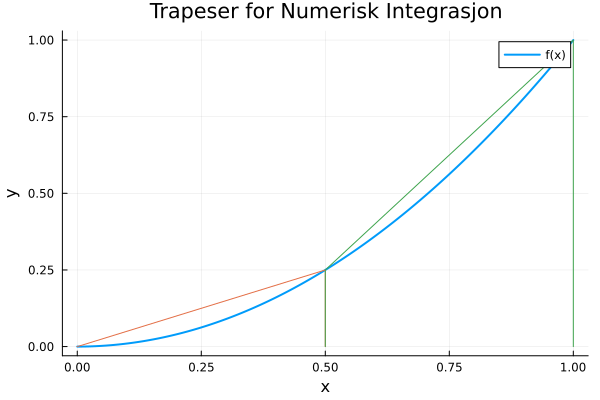

In [42]:
# Illustrering av trapesene som brukes i den numeriske integrasjonen
using Plots
function plot_trapezoids(f, a, b, n)
    x = range(a, b, length = 1000)
    plot(x, f.(x), label="f(x)", lw=2)
    
    dx = (b - a) / n
    for i = 0:n-1
        x0, x1 = a + i*dx, a + (i+1)*dx
        plot!([x0, x0, x1, x1], [0, f(x0), f(x1), 0], label="", fill=(0.2, :blue))
    end

    plot!(legend=:topright)
    xlabel!("x")
    ylabel!("y")
    title!("Trapeser for Numerisk Integrasjon")
end

plot_trapezoids(f, 0, 1, 2)


## Simpson's Rule (Simpsons metode/Simpsons integrasjon)

Simpsons metode er en raffinering av trapesmetoden. Den bruker paraboler, ikke linjer, for å tilnærme hver del av kurven. Tenk på det slik: Hvis trapesmetoden er som å tegne rette linjer mellom punktene på vår funksjon, er Simpsons metode som å tegne en jevn, buet linje (en parabel) gjennom dem.

![simpsons-6a.png](https://www.intmath.com/integration/img/simpsons-6a.png)


### Hvorfor Parabler?

Parabler kan fange opp formen av mange funksjoner bedre enn rette linjer, spesielt over korte intervaller. Dette betyr at for samme antall intervaller (eller "trinn"), kan Simpsons metode gi en mer nøyaktig tilnærming til det virkelige integralet.





### Youtube Video om Simpsons metode

In [6]:
YouTube("7EqRRuh-5Lk")

https://www.youtube.com/watch?v=7EqRRuh-5Lk&start=0

### Simpsons metode Formel

Ikke stress, denne kan virke litt komplisert, men dere trenger bare å forstå den overordnede ideen og huske formelen for eksamen, som dere kan se er ganske lik trapesmetoden. (Dere kan skrive den ned som en huskelapp på eksamen)

$$\int_a^b f(x) dx \approx \frac{h}{3} \left(f(x_0) + 4 \left(\sum_{i=1}^{n/2-1} f(x_{2i})\right) + 2 \left(\sum_{i=1}^{n/2} f(x_{2i-1})\right) + f(x_n)\right).$$

Denne kommer fra at man kan bruke noe som kalles "Lagrange Interpolating Polynomials" for å tilnærme funksjonen $f(x)$ med en parabel, på en slik måte:


$$
P_i(x) = f(x_{i-1})\frac{(x - x_i)(x - x_{i+1})}{(x_{i-1} - x_i)(x_{i-1} - x_{i+1})} + f(x_i)\frac{(x - x_{i-1})(x - x_{i+1})}{(x_{i} - x_{i-1})(x_{i} - x_{i+1})}\\
+ f(x_{i+1})\frac{(x - x_{i-1})(x - x_{i})}{(x_{i+1} - x_{i-1})(x_{i+1} -
x_{i})}
$$

Hvis man da setter inn $h$:

$$
P_i(x) = \frac{f(x_{i-1})}{2h^2} (x - x_i)(x - x_{i+1}) - \frac{f(x_i)}{h^2} (x - x_{i-1})(x - x_{i+1}) + \frac{f(x_{i+1})}{2h^2} (x - x_{i-1})(x - x_{i}).
$$

Til slutt får man:

$$\int_{x_{i-1}}^{x_{i+1}} P_i(x) dx = \frac{h}{3}(f(x_{i-1}) + 4f(x_i) + f(x_{i+1})$$

Med noen effektiviseringer:

$$\int_a^b f(x) dx \approx \frac{h}{3} \left[f(x_0)+4 \left(\sum_{i=1, i\  {\text{odd}}}^{n-1}f(x_i)\right)+2 \left(\sum_{i=2, i\  {\text{even}}}^{n-2}f(x_i)\right)+f(x_n)\right].$$

Midtverdiene vektes forskjellig: de som ligger på oddetallsposisjoner (1, 3, 5, ...) multipliseres med 4, og de på partallsposisjoner (2, 4, 6, ...) multipliseres med 2.
Dette skyldes måten paraboler passer inn i metoden. For hver parabel som brukes til å tilnærme funksjonen, er den midterste punktet (oddetallet) sentral og gir derfor en større vekt (4), mens punktene på hver side (partallene) er delt med naboparaboler og vektes derfor mindre (2). 

Dette er illustrert med denne figuren:


![21.04.2-Simpson_integral_2.png](https://pythonnumericalmethods.berkeley.edu/_images/21.04.2-Simpson_integral_2.png)


Tenk deg at du tegner en glatt, bølgende ås og du skal estimere arealet under denne åsen. Med Simpsons metode deler du åsen inn i like store seksjoner, og i hver seksjon tegner du en parabel (en slags buet linje) som passer best med åsens form i denne seksjonen.

    I hver seksjon, er det punktet i midten (som ligger på en oddetallsplass) veldig viktig fordi det bestemmer hvor buet parabelen skal være. Derfor gir vi dette punktet en større vekt i vår beregning (ganger det med 4).
    Punkter på sidene (som ligger på partallsplasser) er også viktige, men de deles mellom to parabeler (en på hver side), så vi gir dem en mindre vekt (ganger dem med 2).
    Endepunktene på hver kant av åsen brukes kun en gang hver, så de får ingen ekstra vekt.

Ved å følge denne metoden, får du en ganske nøyaktig tilnærming til det totale arealet under din bølgende ås, selv med et begrenset antall seksjoner. Det er derfor Simpsons metode er så kraftig, spesielt for glatte, regelmessig formede funksjoner.

#### Valg av $n$

I Simpsons metode må $n$ være et partall.
Dette skyldes at Simpsons metode er basert på å bruke paraboler for å tilnærme integrasjonen, og hver parabel trenger tre punkter for å bli definert. Disse tre punktene kommer fra to tilstøtende intervaller. Derfor, for å dekke hele integrasjonsområdet, trenger vi et partall av intervaller slik at vi kan danne et helt antall parabolske segmenter.

### Simpsons metode i Julia

In [60]:
function IntegrerSimpson(f, a, b, n)
    dx = (b - a) / n  # Bredden til delintervallene
    ivg = a:dx:b      # Delintervallgrensene for en oppdeling av [a, b] med intervallbredde dx
    y = f.(ivg)       # Evaluerer funksjonen f ved hvert punkt i ivg
    I = (y[1] + 4 * sum(y[2:2:n]) + 2 * sum(y[3:2:n-1]) + y[n + 1]) * (dx / 3)  # Beregner det tilnærmede integralet
    return I
end

# Definerer funksjonen f(x) = x^4 (integralet er 1/5*x^5)
f(x) = x^4
a = 0.0
b = 1.0
n = 10

I = IntegrerSimpson(f, a, b, n)

feilmarg = abs(I - 1/5)


1.333333333330966e-5

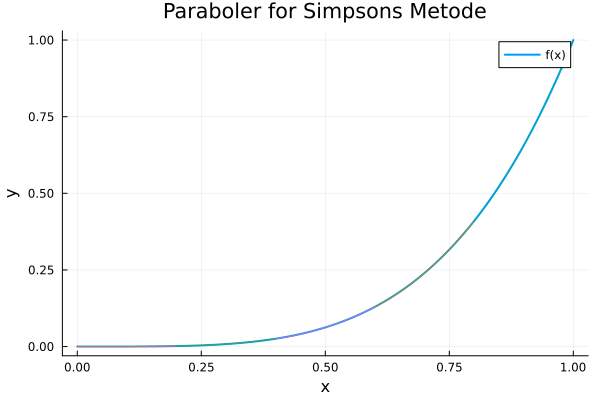

In [61]:
# Illustrering av trapesene som brukes i den numeriske integrasjonen
function plot_parabolas(f, a, b, n)
    x = range(a, b, length = 1000)
    plot(x, f.(x), label="f(x)", lw=2)

    h = (b - a) / n
    for i = 1:2:n-1
        x0, x1, x2 = a + (i-1)*h, a + i*h, a + (i+1)*h
        y0, y1, y2 = f(x0), f(x1), f(x2)

        # Minste kvadraters metode for å finne parabelen
        A = [x0^2 x0 1; x1^2 x1 1; x2^2 x2 1]
        b = [y0; y1; y2]
        parabola_coeffs = A \ b

        parabola_x = range(x0, x2, length=100)
        parabola_y = parabola_coeffs[1] .* parabola_x.^2 .+ parabola_coeffs[2] .* parabola_x .+ parabola_coeffs[3]

        plot!(parabola_x, parabola_y, label="", fill=(0.2, :orange))
    end

    plot!(legend=:topright)
    xlabel!("x")
    ylabel!("y")
    title!("Paraboler for Simpsons Metode")
end

plot_parabolas(f, 0, 1, 10)
